# Exploratory Data Analysis

In [32]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Load Cleaned Data

In [56]:
df = pd.read_csv('data/flightsmerged.csv', low_memory=False)
print(df.columns)
df.head()

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AC', 'DESTINATION_AC', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE', 'AIRLINE_CODE', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],
      dtype='object')


,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AC,DESTINATION_AC,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,1,4,98,N407AS,ANC,SEA,00:05:00,23:54:00,-11.00,...,nan,nan,nan,nan,nan,2015-01-01,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
1,1,1,4,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,-8.00,...,nan,nan,nan,nan,nan,2015-01-01,AA,American Airlines Inc.,Los Angeles International Airport,Palm Beach International Airport
2,1,1,4,840,N171US,SFO,CLT,00:20:00,00:18:00,-2.00,...,nan,nan,nan,nan,nan,2015-01-01,US,US Airways Inc.,San Francisco International Airport,Charlotte Douglas International Airport
3,1,1,4,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,-5.00,...,nan,nan,nan,nan,nan,2015-01-01,AA,American Airlines Inc.,Los Angeles International Airport,Miami International Airport
4,1,1,4,135,N527AS,SEA,ANC,00:25:00,00:24:00,-1.00,...,nan,nan,nan,nan,nan,2015-01-01,AS,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport


## Data Perspective
- One variable
    - Numeric variables:
        - continuous: average income
        - discrete: population
    - Categorical variables:
        - ordinal: grade
        - nominal: house, apartment, townhouse, etc.
- Multiple variables:
    - Numeric x Numeric
    - Categorical x Numeric
    - Categorical x Categorical

## 2. One Variable

### 2.1. Numeric


KeyboardInterrupt



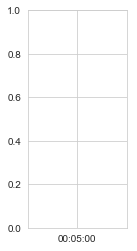

### 2.2. Categorical

## 2. Multiple Variables

### 2.1. Numeric X Numeric

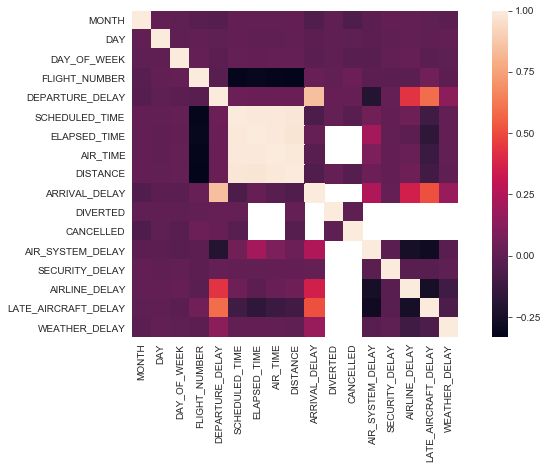

In [57]:

correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, square=True)
plt.show()


AttributeError: 'Series' object has no attribute 'datetime'

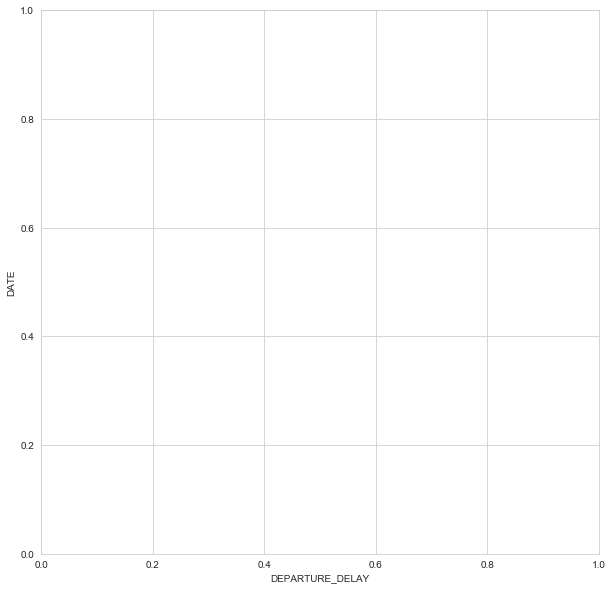

In [55]:
#Correlation between Delay x SQFT

plt.figure(figsize=(10,10))

plt.plot(df['DEPARTURE_DELAY'], df['MONTH'])
plt.xlabel('DEPARTURE_DELAY')
plt.ylabel('DATE')


### 2.2. Numeric X Categorical